In [32]:
import numpy as np
import pandas as pd
import queue
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, r'..')

from Backtest import *
from Backtest.data import OHLCDataHandler
from AOStrategy import AOStrategy
from Backtest.open_json_gz_files import open_json_gz_files
from Backtest.generate_bars import generate_bars

In [33]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
import hyperopt.pyll.stochastic

In [34]:
def run_backtest(config, trading_data, ohlc_data, window):
    window = int(window)
    config['title'] = "AOStrategy" + "_" + str(window)
    print("---------------------------------")
    print(config['title'])
    print("---------------------------------")
    
    events_queue = queue.Queue()

    data_handler = OHLCDataHandler(
        config, events_queue,
        trading_data = trading_data, ohlc_data = ohlc_data
    )
    strategy = AOStrategy(config, events_queue, data_handler,window = window)

    backtest = Backtest(config, events_queue, strategy,
                        data_handler= data_handler)

    results = backtest.start_trading()
    
    # dict_ans = {
    #     "short_window": [short_window],
    #     "long_window": [long_window],
    #     "Sharpe Ratio": [results['sharpe']],
    #     "Total Returns": [(results['cum_returns'][-1] - 1)],
    #     "Max Drawdown": [(results["max_drawdown"] * 100.0)],
    #     "Max Drawdown Duration": [(results['max_drawdown_duration'])],
    #     "Trades": [results['trade_info']['trading_num']],
    #     "Trade Winning": [results['trade_info']['win_pct']],
    #     "Average Trade": [results['trade_info']['avg_trd_pct']],
    #     "Average Win": [results['trade_info']['avg_win_pct']],
    #     "Average Loss": [results['trade_info']['avg_loss_pct']],
    #     "Best Trade": [results['trade_info']['max_win_pct']],
    #     "Worst Trade": [results['trade_info']['max_loss_pct']],
    #     "Worst Trade Date": [results['trade_info']['max_loss_dt']],
    #     "Avg Days in Trade": [results['trade_info']['avg_dit']]
    # }
    # return pd.DataFrame(dict_ans)
    return -1 * (results['cum_returns'][-1] - 1)

In [66]:
def f(params):
    config = {
        "csv_dir": "./Binance",
        "out_dir": "./results/MACDStrategy",
        "title": "AOStrategy",
        "is_plot": False,
        "save_plot": False,
        "save_tradelog": False,
        "start_date": pd.Timestamp("2018-02-01T00:0:00", freq = "60" + "T"),    # str(freq) + "T"
        "end_date": pd.Timestamp("2018-06-01T00:00:00", freq = "60" + "T"),
        "equity": 1.0,
        "freq": 60,      # min
        "commission_ratio": 0.001,
        "suggested_quantity": None,     # None or a value
        "max_quantity": None,           # None or a value, Maximum purchase quantity
        "min_quantity": None,           # None or a value, Minimum purchase quantity
        "min_handheld_cash": None,      # None or a value, Minimum handheld funds
        "exchange": "Binance",
        "tickers": ['BTCUSDT']
    }
    # trading_data = {}
    # for ticker in config['tickers']:
    #     # trading_data[ticker] = open_gz_files(config['csv_dir'], ticker)
    #     trading_data[ticker] = pd.read_hdf(config['csv_dir'] + '\\' + ticker + '.h5', key=ticker)

    ohlc_data = {}
    for ticker in config['tickers']:
        # ohlc_data[ticker] = generate_bars(trading_data, ticker, config['freq'])
        ohlc_data[ticker] = pd.read_hdf(config['csv_dir'] + '\\' + ticker + '_OHLC_30min.h5', key=ticker)

    trading_data = None
    
    window = params['window']
    val = run_backtest(config, trading_data, ohlc_data, window)
    return {'loss': val, 'status': STATUS_OK}

In [67]:
space = {
    'window': hp.randint('window', 240),
}

In [68]:
# print(hyperopt.pyll.stochastic.sample(space))

In [69]:
trials = Trials()

In [70]:
best = fmin(fn=f, space=space, algo=tpe.suggest, max_evals=50, trials=trials)

---------------------------------
AOStrategy_39
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2018-02-01 00:00:00
	End Date	: 2018-06-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.8085953485
Sortino Ratio: 1.5818185939
Information Ratio: 0.9518416541
Max Drawdown: 0.2602694479
Max Drawdown Duration: 494000
Total Returns: 0.1068562719
Annualized Returns: 0.3250211605
Compound Annual Growth Rate: 0.3617921474
---------------------------------
Trades: 71
Trade Winning: 45.07%
Average Trade: 0.41%
Average Win: 3.31%
Average Loss: -1.97%
Best Trade: 14.64%
Worst Trade: -4.50%
Worst Trade Date: 0 days 22:30:00
Avg Days in Trade: 0 days 20:28:44
---------------------------------
---------------------------------
AOStrategy_94
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 

Sharpe Ratio: -0.4687369060
Sortino Ratio: -0.5976152430
Information Ratio: -0.1020879657
Max Drawdown: 0.3875052276
Max Drawdown Duration: 480400
Total Returns: -0.1292218610
Annualized Returns: -0.3930498272
Compound Annual Growth Rate: -0.3435242334
---------------------------------
Trades: 14
Trade Winning: 35.71%
Average Trade: -0.48%
Average Win: 7.35%
Average Loss: -4.82%
Best Trade: 22.49%
Worst Trade: -12.28%
Worst Trade Date: 2 days 09:00:00
Avg Days in Trade: 3 days 14:57:51
---------------------------------
---------------------------------
AOStrategy_131
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2018-02-01 00:00:00
	End Date	: 2018-06-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.5041396715
Sortino Ratio: 2.2288756858
Information Ratio: 1.7501239575
Max Drawdown: 0.2438048566
Max D

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -0.7063806493
Sortino Ratio: -0.8116706887
Information Ratio: -0.2760149136
Max Drawdown: 0.3669016182
Max Drawdown Duration: 480400
Total Returns: -0.1608749491
Annualized Returns: -0.4893279702
Compound Annual Growth Rate: -0.4134484706
---------------------------------
Trades: 13
Trade Winning: 46.15%
Average Trade: -0.89%
Average Win: 4.49%
Average Loss: -5.50%
Best Trade: 7.97%
Worst Trade: -10.52%
Worst Trade Date: 2 days 20:30:00
Avg Days in Trade: 3 days 21:48:28
---------------------------------
---------------------------------
AOStrategy_131
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2018-02-01 00:00:00
	End Date	: 2018-06-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.5041396715
Sortin

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -0.6593004953
Sortino Ratio: -0.8643959320
Information Ratio: -0.2534993961
Max Drawdown: 0.3947890656
Max Drawdown Duration: 480400
Total Returns: -0.1610331468
Annualized Returns: -0.4898091548
Compound Annual Growth Rate: -0.4137847557
---------------------------------
Trades: 14
Trade Winning: 28.57%
Average Trade: -0.76%
Average Win: 8.53%
Average Loss: -4.47%
Best Trade: 20.67%
Worst Trade: -12.61%
Worst Trade Date: 2 days 10:30:00
Avg Days in Trade: 3 days 15:21:26
---------------------------------
---------------------------------
AOStrategy_46
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2018-02-01 00:00:00
	End Date	: 2018-06-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.4716338389
Sortin

---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -0.1733745231
Sortino Ratio: -0.2346982959
Information Ratio: 0.1128700732
Max Drawdown: 0.3480111358
Max Drawdown Duration: 480400
Total Returns: -0.0985656790
Annualized Returns: -0.2998039401
Compound Annual Growth Rate: -0.2706692551
---------------------------------
Trades: 31
Trade Winning: 38.71%
Average Trade: 0.04%
Average Win: 6.38%
Average Loss: -3.96%
Best Trade: 19.00%
Worst Trade: -10.83%
Worst Trade Date: 1 days 01:00:00
Avg Days in Trade: 1 days 18:24:12
---------------------------------
---------------------------------
AOStrategy_236
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2018-02-01 00:00:00
	End Date	: 2018-06-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -0.2354502894
Sortino Ratio: -0.2894095686
Information Ratio: 0.0700512495
Max Drawdown: 0.2900866082
Max Drawdown Duration: 480400
Total Returns: -0.0972579195
Annualized Returns: -0.2958261718
Compound Annual Growth Rate: -0.2674461613
---------------------------------
Trades: 33
Trade Winning: 39.39%
Average Trade: 0.07%
Average Win: 5.19%
Average Loss: -3.25%
Best Trade: 17.39%
Worst Trade: -10.39%
Worst Trade Date: 1 days 03:00:00
Avg Days in Trade: 1 days 17:07:16
---------------------------------


In [71]:
best

{'window': 131}

In [72]:
for trial in trials.trials:
    print(trial['misc']['vals'], "\t",trial['result']['loss'])

{'window': [39]} 	 -0.10685627194068736
{'window': [94]} 	 0.19560595258452917
{'window': [148]} 	 -0.00485937595098207
{'window': [23]} 	 0.39769651523411154
{'window': [142]} 	 -0.285284547615442
{'window': [171]} 	 0.17074234483146278
{'window': [115]} 	 -0.09850551093116788
{'window': [151]} 	 0.021315030853610084
{'window': [122]} 	 -0.1844699417447253
{'window': [175]} 	 0.12922186101078825
{'window': [131]} 	 -0.2891609314172754
{'window': [153]} 	 0.0734778386549566
{'window': [125]} 	 -0.17709333203436883
{'window': [186]} 	 0.1439200344279047
{'window': [198]} 	 0.14761891982963116
{'window': [198]} 	 0.14761891982963116
{'window': [101]} 	 0.048152295516945
{'window': [94]} 	 0.19560595258452917
{'window': [170]} 	 0.16737185554821088
{'window': [226]} 	 0.16087494912090505
{'window': [131]} 	 -0.2891609314172754
{'window': [8]} 	 0.6824091262530669
{'window': [40]} 	 -0.2755726197079347
{'window': [131]} 	 -0.2891609314172754
{'window': [235]} 	 0.11165121452275029
{'window

---------------------------------
AOStrategy_131
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2018-04-01 00:00:00
	End Date	: 2018-08-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 2.2685329348
Sortino Ratio: 3.2814892312
Information Ratio: 1.6132110435
Max Drawdown: 0.2437555176
Max Drawdown Duration: 213700
Total Returns: 0.4209039153
Annualized Returns: 1.2592617137
Compound Annual Growth Rate: 1.8605108699
---------------------------------
Trades: 12
Trade Winning: 41.67%
Average Trade: 3.69%
Average Win: 13.27%
Average Loss: -3.15%
Best Trade: 28.82%
Worst Trade: -6.45%
Worst Trade Date: 2 days 00:00:00
Avg Days in Trade: 5 days 14:25:00
---------------------------------


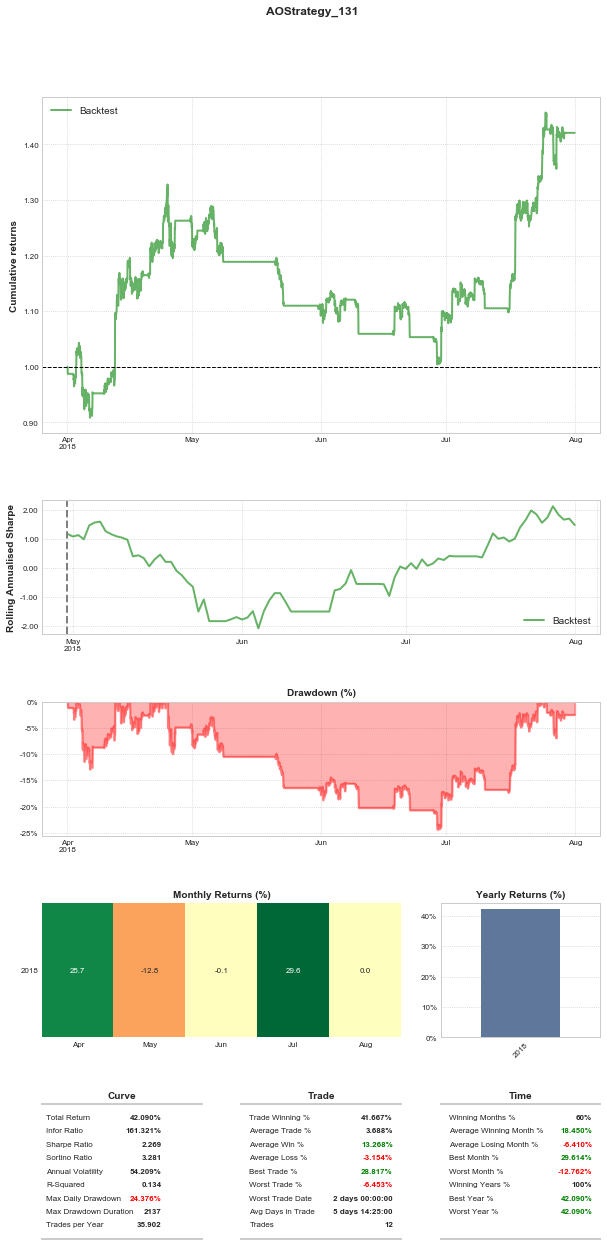

-0.4209039152617928

In [74]:
config = {
    "csv_dir": "./Binance",
    "out_dir": "./results/AOStrategy",
    "title": "AOStrategy",
    "is_plot": True,
    "save_plot": True,
    "save_tradelog": True,
    "start_date": pd.Timestamp("2018-04-01T00:0:00", freq = "60" + "T"),    # str(freq) + "T"
    "end_date": pd.Timestamp("2018-08-01T00:00:00", freq = "60" + "T"),
    "equity": 1.0,
    "freq": 60,      # min
    "commission_ratio": 0.001,
    "suggested_quantity": None,     # None or a value
    "max_quantity": None,           # None or a value, Maximum purchase quantity
    "min_quantity": None,           # None or a value, Minimum purchase quantity
    "min_handheld_cash": None,      # None or a value, Minimum handheld funds
    "exchange": "Binance",
    "tickers": ['BTCUSDT']
}
ohlc_data = {}
for ticker in config['tickers']:
    # ohlc_data[ticker] = generate_bars(trading_data, ticker, config['freq'])
    ohlc_data[ticker] = pd.read_hdf(config['csv_dir'] + '\\' + ticker +'_OHLC_60min.h5', key=ticker)

trading_data = None
run_backtest(config,ohlc_data,ohlc_data,131)

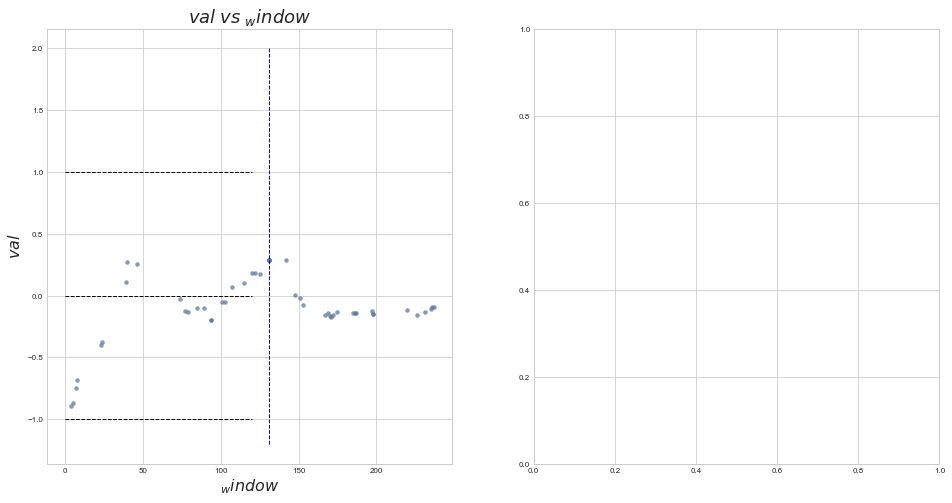

In [75]:
f, ax = plt.subplots(1,2, figsize = (16, 8))
xs = [t['misc']['vals']['window'] for t in trials.trials]
ys = [-1 * t['result']['loss'] for t in trials.trials]
ax[0].scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax[0].set_title('$val$ $vs$ $_window$ ', fontsize=18)
ax[0].set_xlabel('$_window$', fontsize=16)
ax[0].set_ylabel('$val$', fontsize=16)
ax[0].hlines(0, 0, 120, color='black',linestyle="--")
ax[0].hlines(-1, 0, 120, color='black',linestyle="--")
ax[0].hlines(1, 0, 120, color='black',linestyle="--")
ax[0].vlines(best['window'], -1.2, 2, color='blue',linestyle="--")

In [ ]:
f, ax = plt.subplots(1,2, figsize = (16, 8))
xs = [t['misc']['vals']['window'] for t in trials.trials]
ys = [-1 * t['result']['loss'] for t in trials.trials]
ax[0].scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax[0].set_title('$val$ $vs$ $_window$ ', fontsize=18)
ax[0].set_xlabel('$_window$', fontsize=16)
ax[0].set_ylabel('$val$', fontsize=16)
ax[0].hlines(0, 0, 120, color='black',linestyle="--")
ax[0].hlines(-1, 0, 120, color='black',linestyle="--")
ax[0].hlines(1, 0, 120, color='black',linestyle="--")
ax[0].vlines(best['window'], -1.2, 2, color='blue',linestyle="--")